# Pandas Modülüne Giriş: TOP 5000 youtube kanalı ile alakalı veri analizi

Bu dersimizde pandas modülü üzerinden bir excel dosyasından veri okuyup, verileri görselleştirmeye giriş yapacağız.

Daha önce, programlamaya giriş dersinde, aslında modüllere giriş konusu yapmıştık. Modüllerin ilk örnekleri __turtle__
ile görmüştük. Modülleri birçok işimiz kolaylaştıran kütüphanler olarak görmek kolay olarak anlamlandırma da yardımcı olabilir.

Projemize öncellikle nasıl bir modülü dahil edeceğimizi söyleyerek başlayalım:
    
    import modul_ismi
    
yazdığımızda projemiz o modulün metodlarını ve değişkenlerini kullabilir hale geliyor.

Burada kullanıdığımız modül ismi bizim için daha sonra metodları ve diğer değişkenleri çağırmada kullanacağımız için 
modül isimlerini ksaıltmak adına aşağıda belirttiğimiz gibi yazılabilir:
    
    import modul_ismi as modul_kısaltma_isim
    
Tabi ki bu bir zorunluluk olmamakla beraber google da araştırdığınızda bu kullanımı sıklıkla göreceksiniz.
Şimdi bunu gerçek bir modül üzerinden yapalım ve projemize __pandas__ modülünü dahil edelim.


In [1]:
import pandas as pd

Pandas, Python programlama dili için yüksek performanslı, kullanımı kolay veri yapıları ve veri analizi araçları 
sağlayan açık kaynaklı, BSD lisanslı bir kütüphanedir.

Pandas kütüphanesini özel ve verimli kılan şey , verileri (CSV veya TSV dosyası veya bir SQL veritabanı gibi) alması ve istatistiksel bir yazılımdaki tabloya çok benzeyen veri çerçevesi adı verilen(__DataFrame__) satır ve sütunlarla bir Python nesnesi oluşturmasıdır.

Python kütüphanesi referanslarda vereceğim liklerden takip edebileceğiniz üzere matlplotlib ve numpy kütüphanelerine
(diğer sıklıkla kullanılan kütüphane) dayanmaktadır/beraber kullanılmaktadır. 

Pandas'ı veri analizi için kullanmak istediğinizde, bunu yapmakta itemenizin üç temel başlık altında toplanabilir:

 - Bir Python’un listesini, dictionary'sini veya Numpy dizisini bir Pandas __DataFrame__'e  dönüştürmek
 - Genellikle bir CSV dosyasını olan Pandas'ı kullanarak yerel bir dosya açın,yada ayrılmış bir metin dosyası
   (Excel, vb. de olabilir).
 - CSV veya JSON gibi bir uzak dosyaya veya veritabanına URL yoluyla veri okuyabilir veya bir SQL tablosundan/veritabanından
   veri okunabilir.

## CSV dosyasından veri okumak

Daha önce bahsettiğimiz gibi __pandas__ ile bir çok veir tipi okunabiliyor. Genelde dosya okulmak için:
    
    pd.read_dosya_tipi()

Örneğin:
    
    pd.read_csv('dosya_yolu/dosya.csv')

şeklinde komut verilir.(Bir çok parametre daha verilebilir, pandas dökümanına __[bakmanız](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ lazım.) 

Bu dersimizde data analiz için Top 5000 Youtube channels data from Socialblade isimli __[kaagle.com](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade)__ sitesinideki CSV dosyasını kullanıcağız.
Öncelikle, ilk olarak veri setimizi dahil edelim:

In [9]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


Bir üst satırda __df__ isimli bir dataFrame yarattık ve burada CSV uzantılı dosyamızda ki verileri tuttuk.
df.info() komutuyla dataframe'mizin içieriğinde neler olduğunu listeledik.

DataFrame'lerde listelerdeki indislerden farklı olarak kolon isimlerini(dictionary'lerde olduğu gibi) kullabiliriz.
Örnegğin __Channel name__ isimli kolonu almak için aşağıdaki yaızımı kullabiliriz: 

In [7]:
kanallar=df['Channel name']
kanallar.head(5)

0                        Zee TV
1                      T-Series
2    Cocomelon - Nursery Rhymes
3                     SET India
4                           WWE
Name: Channel name, dtype: object

Burada __info()__, metodu dışında __head(5)__ metoduyla ilk 5 satırı ekranda yazdırmak için gereken bir metod öğrendik.
DataFarame ler üzerinden çeşitli basit istatistikler veren metodlar çağırabiliriz. Aşağıda bir kaç örenk bulacaksınız: 

In [8]:
df.mean()

Video views    1.071449e+09
dtype: float64

Burada __mean()__ metodu numerik değere sahip olan __Video views__ kolonundan ortalama değeri hesaplıyor. 
Peki DataFrame de veri tiplerini değiştirebilir miyiz?
Bu sorunu cevabı __EVET__

In [10]:
df['Subscribers']=pd.to_numeric(df['Subscribers'],errors='coarse')

In [11]:
df['Subscribers'].mean()

2620004.1344027747

Text(0.5,1,'İlk 5 Youtube kanalı üye sayısı karşılatırma')

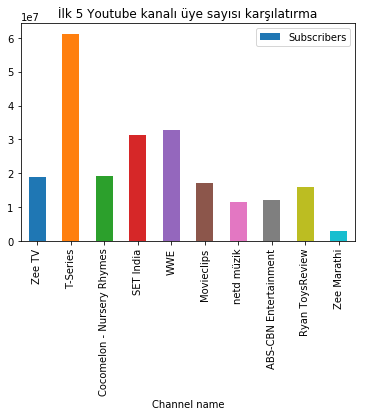

In [15]:
import matplotlib.pyplot as plt
df.head(10).plot.bar(x = 'Channel name', y = 'Subscribers')
plt.title('İlk 5 Youtube kanalı üye sayısı karşılatırma')

Bir üst satırdaki örnekte ise dataFrame içindeki iki ayrı kolondaki verilere göre bir histogram çizdirdik. Histogram dışında
normal grafikelerde çizbiliriz:    

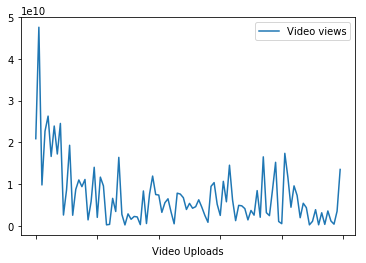

In [16]:
df.head(100).plot(x='Video Uploads', y='Video views')

### DataFrame Veri Filtreleme ve Indisler vasıtasıyla verilere Ulaşma

Listelerde olduğu gibi verilere indisler vasıtatyla da ulaşabiliyoruz. Liste veri yapılarında ki olduğu gibi ilk indis yine 
0(sıfır)'dan başlıyor. Yanlız burada listelrden farklı olarak __iloc()__ metod üzerinden çağırıyoruz. Örnek vermek gerekirse:

In [19]:
df.iloc[0,1]

'A++ '

Bu örnekte verimizn birinci satırndaki 2. kolondaki veriyi çekmiş olduk.